In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\yolai\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df_DA_IN = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')].copy()

df_DA_IN = df_DA_IN.dropna(subset=['salary_year_avg'])

df_DA_IN['salary_year_avg'].sample(10)

420437     93600.0
564427     75067.5
620322     49566.5
380987     79200.0
716357    100500.0
613935    100500.0
646594     64800.0
180256     64600.0
168402    650000.0
320245     64800.0
Name: salary_year_avg, dtype: float64

<Axes: >

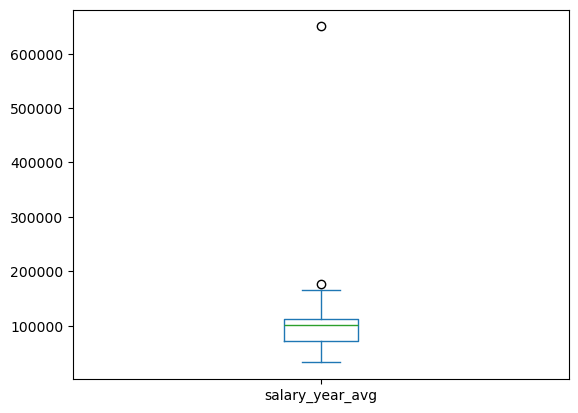

In [5]:
df_DA_IN['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x2318f338610>,
 'caps': [<matplotlib.lines.Line2D at 0x2318f3399d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2318f32fc10>],
 'medians': [<matplotlib.lines.Line2D at 0x2318f33ac50>],
 'fliers': [<matplotlib.lines.Line2D at 0x2318f33b590>],
 'means': []}

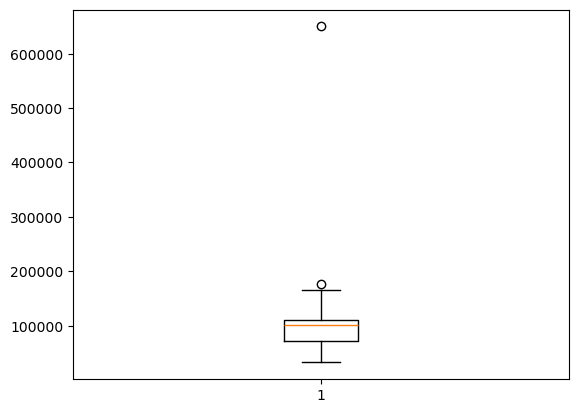

In [8]:
plt.boxplot(df_DA_IN['salary_year_avg'])

<Axes: >

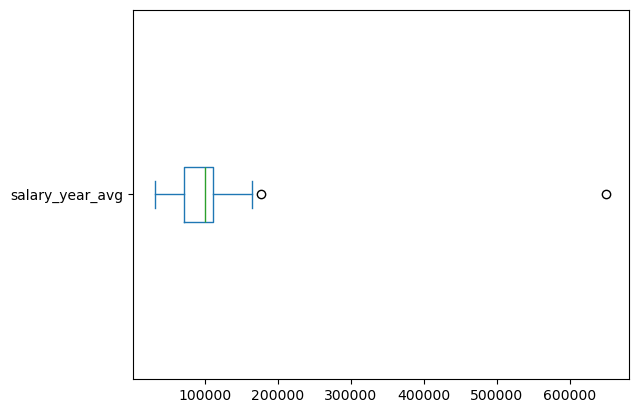

In [9]:
df_DA_IN['salary_year_avg'].plot(kind='box', vert=False)

In [11]:

#df_IN = df_IN.dropna(subset=['salary_year_avg'])

#df_IN['salary_year_avg'].sample(10)

In [35]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()
df_IN = df_IN.dropna(subset=['salary_year_avg'])

job_list = [df_IN[df_IN['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]


In [25]:
df_IN['job_title_short'].value_counts()

job_title_short
Data Engineer     169
Data Analyst       94
Data Scientist     92
Name: count, dtype: int64

In [27]:
job_list[0]

11412      50400.0
27487     165000.0
29583     119250.0
32890     105000.0
41257      57500.0
            ...   
774606     79200.0
774809    102500.0
777313    111202.0
784033    111175.0
785515    105000.0
Name: salary_year_avg, Length: 94, dtype: float64

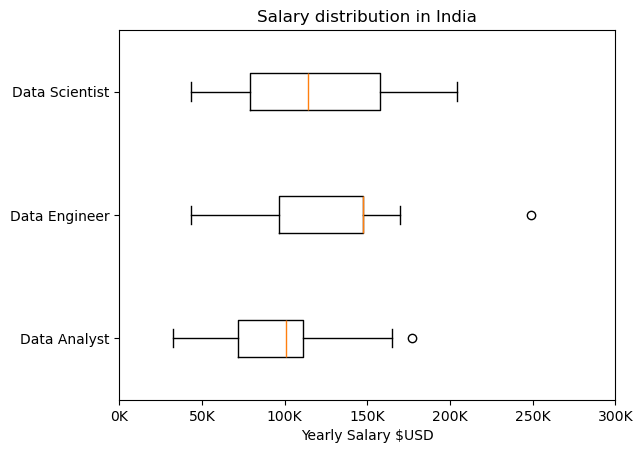

In [36]:
plt.boxplot(job_list, labels= job_titles, vert=False)
plt.title('Salary distribution in India')
plt.xlabel('Yearly Salary $USD')
plt.xlim(0, 300000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
plt.show()
